# **CASE: Titanic Kaggle**

---

### Instalação de bibliotecas

In [ ]:
# Para cálculo do VIF
install.packages("rms")
# Para cálculo do KS e AUC
install.packages("ROCR")

### Carregamento de bibliotecas

In [44]:
library(rms)
library(ROCR)

Loading required package: Hmisc


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




### Leitura da base de dados

In [3]:
dados_titanic <- read.table(file = "../data/titanic_train.csv",
                            sep = ",",
                            dec = ".",
                            header = TRUE)

In [62]:
#Removendo embarque vazio e tirando NA da idade
dados_titanic <- dados_titanic[dados_titanic$Embarked != "",]
dados_titanic$Age[is.na(dados_titanic$Age)] <- 0


### Visualização da base de dados

In [63]:
View(dados_titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,probabilidade,predito
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<fct>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,0.08938019,0
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,0.90096553,1
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,0.62007138,1
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0.91227677,1
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0.07404249,0
6,6,0,3,"Moran, Mr. James",male,0,0,0,330877,8.4583,,Q,NA,NA
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0.32180509,0
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,0.10166898,0
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S,0.60951293,1


### Análise exploratória breve

In [64]:
# Medidas resumo
summary(dados_titanic)

  PassengerId     Survived          Pclass          Name          
 Min.   :  1   Min.   :0.0000   Min.   :1.000   Length:889        
 1st Qu.:224   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446   Mean   :0.3825   Mean   :2.312                     
 3rd Qu.:668   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891   Max.   :1.0000   Max.   :3.000                     
                                                                  
     Sex                 Age            SibSp            Parch       
 Length:889         Min.   : 0.00   Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.: 6.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Mode  :character   Median :24.00   Median :0.0000   Median :0.0000  
                    Mean   :23.74   Mean   :0.5242   Mean   :0.3825  
                    3rd Qu.:35.00   3rd Qu.:1.0000   3rd Qu.:0.0000  
                    Max.   :80.00   Max.   :

In [65]:
# Tabela de frequências: gênero
table(dados_titanic$Sex)
prop.table(table(dados_titanic$Sex))


female   male 
   312    577 


   female      male 
0.3509561 0.6490439 

In [66]:
# Tabela de frequências: Local de Embarque
table(dados_titanic$Embarked)
prop.table(table(dados_titanic$Embarked))


  C   Q   S 
168  77 644 


         C          Q          S 
0.18897638 0.08661417 0.72440945 

In [67]:
# Tabela de frequências: Tipo Ticket
table(dados_titanic$Pclass)
prop.table(table(dados_titanic$Pclass))


  1   2   3 
214 184 491 


        1         2         3 
0.2407199 0.2069741 0.5523060 

In [35]:
# Tabela de frequências: Survival
table(dados_titanic$Survived)
prop.table(table(dados_titanic$Survived))


  0   1 
549 340 


        0         1 
0.6175478 0.3824522 

### Análise bivariada: variável resposta vs. variáveis explicativas

In [68]:
# Comando auxiliar para aumentar resolução do gráfico (recomendado apenas no Colab)
reset_options <- options()
options(repr.plot.width = 20, repr.plot.height = 7)

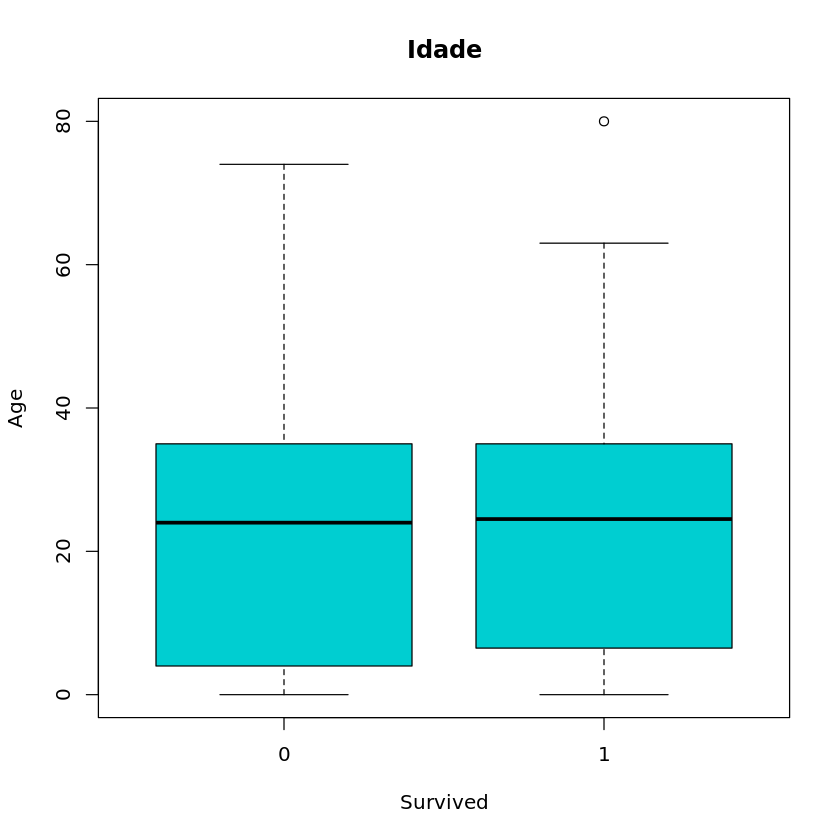

In [71]:
# Gráficos de boxplots
boxplot(Age ~ Survived, data = dados_titanic, col = "darkturquoise", main = "Idade")

In [70]:
# Resetando parâmetros gráficos (recomendado apenas no Colab)
options(reset_options)

In [72]:
# Tabela de frequências: gênero versus sobrevivencia
table(dados_titanic$Sex, dados_titanic$Survived)
prop.table(table(dados_titanic$Sex, dados_titanic$Survived), 1)

        
           0   1
  female  81 231
  male   468 109

        
                 0         1
  female 0.2596154 0.7403846
  male   0.8110919 0.1889081

In [73]:
# Tabela de frequências: Tipo ticket versus sobrevivencia
table(dados_titanic$Pclass, dados_titanic$Survived)
prop.table(table(dados_titanic$Pclass, dados_titanic$Survived), 1)

   
      0   1
  1  80 134
  2  97  87
  3 372 119

   
            0         1
  1 0.3738318 0.6261682
  2 0.5271739 0.4728261
  3 0.7576375 0.2423625

In [74]:
# Tabela de frequências: Local embarque versus sobrevivencia
table(dados_titanic$Embarked, dados_titanic$Survived)
prop.table(table(dados_titanic$Embarked, dados_titanic$Survived), 1)

   
      0   1
  C  75  93
  Q  47  30
  S 427 217

   
            0         1
  C 0.4464286 0.5535714
  Q 0.6103896 0.3896104
  S 0.6630435 0.3369565

In [75]:
# Tabela de frequências: Local embarque versus Ticket
table(dados_titanic$Embarked, dados_titanic$Pclass)
prop.table(table(dados_titanic$Embarked, dados_titanic$Pclass), 1)

   
      1   2   3
  C  85  17  66
  Q   2   3  72
  S 127 164 353

   
             1          2          3
  C 0.50595238 0.10119048 0.39285714
  Q 0.02597403 0.03896104 0.93506494
  S 0.19720497 0.25465839 0.54813665

### Modelo de regressão logística múltipla

In [76]:
# Comando auxiliar para para omitir notação científica nos p-valores e controlar largura dos outputs na tela do Colab
options(scipen = 999, width = 200)

In [77]:
# Ajuste do modelo 1: inicial
regressao_1 <- glm(Survived ~
                     Pclass +
                     Sex +
                     Age +
                     SibSp +
                     Parch +
                     Fare +
                     Embarked,
                   family = binomial(link = 'logit'),
                   data = dados_titanic)

summary(regressao_1)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp + Parch + 
    Fare + Embarked, family = binomial(link = "logit"), data = dados_titanic)

Coefficients:
             Estimate Std. Error z value             Pr(>|z|)    
(Intercept)  4.165653   0.479537   8.687 < 0.0000000000000002 ***
Pclass      -0.971245   0.138982  -6.988     0.00000000000278 ***
Sexmale     -2.735807   0.198774 -13.763 < 0.0000000000000002 ***
Age         -0.016617   0.005537  -3.001              0.00269 ** 
SibSp       -0.276860   0.102103  -2.712              0.00670 ** 
Parch       -0.052242   0.115147  -0.454              0.65004    
Fare         0.002296   0.002356   0.975              0.32979    
EmbarkedQ   -0.315779   0.378073  -0.835              0.40359    
EmbarkedS   -0.386173   0.232745  -1.659              0.09707 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1182.82  on 888  degrees of free

In [78]:
# Ajuste do modelo 2 tirando parch
regressao_2 <- glm(Survived ~
                     Pclass +
                     Sex +
                     Age +
                     SibSp +
                     Fare +
                     Embarked,
                   family = binomial(link = 'logit'),
                   data = dados_titanic)

summary(regressao_2)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp + Fare + 
    Embarked, family = binomial(link = "logit"), data = dados_titanic)

Coefficients:
             Estimate Std. Error z value             Pr(>|z|)    
(Intercept)  4.170147   0.478525   8.715 < 0.0000000000000002 ***
Pclass      -0.980629   0.137306  -7.142    0.000000000000921 ***
Sexmale     -2.716299   0.193661 -14.026 < 0.0000000000000002 ***
Age         -0.016762   0.005527  -3.033              0.00243 ** 
SibSp       -0.288831   0.098817  -2.923              0.00347 ** 
Fare         0.002050   0.002265   0.905              0.36534    
EmbarkedQ   -0.301604   0.376420  -0.801              0.42299    
EmbarkedS   -0.388426   0.232597  -1.670              0.09493 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1182.82  on 888  degrees of freedom
Residual deviance:  803.04  on 881  degrees of freedom
AIC: 819.04

Nu

In [79]:
# Ajuste do modelo 3 tirando Fare
regressao_3 <- glm(Survived ~
                     Pclass +
                     Sex +
                     Age +
                     SibSp +
                     Embarked,
                   family = binomial(link = 'logit'),
                   data = dados_titanic)

summary(regressao_3)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp + Embarked, 
    family = binomial(link = "logit"), data = dados_titanic)

Coefficients:
             Estimate Std. Error z value             Pr(>|z|)    
(Intercept)  4.396049   0.412479  10.658 < 0.0000000000000002 ***
Pclass      -1.040355   0.121080  -8.592 < 0.0000000000000002 ***
Sexmale     -2.725832   0.193318 -14.100 < 0.0000000000000002 ***
Age         -0.016794   0.005524  -3.040              0.00237 ** 
SibSp       -0.268354   0.095839  -2.800              0.00511 ** 
EmbarkedQ   -0.329739   0.375313  -0.879              0.37963    
EmbarkedS   -0.429719   0.227807  -1.886              0.05925 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1182.82  on 888  degrees of freedom
Residual deviance:  803.91  on 882  degrees of freedom
AIC: 817.91

Number of Fisher Scoring iterations: 5


In [80]:
# Avaliação de colinearidade no modelo 3
data.frame(VIF = vif(regressao_3))

,VIF
,<dbl>
Pclass,1.357321
Sexmale,1.158347
Age,1.279277
SibSp,1.105406
EmbarkedQ,1.492985
EmbarkedS,1.375996


In [81]:
# Ajuste do modelo 4 tirando embarked
regressao_4 <- glm(Survived ~
                     Pclass +
                     Sex +
                     Age +
                     SibSp,
                   family = binomial(link = 'logit'),
                   data = dados_titanic)

summary(regressao_4)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp, family = binomial(link = "logit"), 
    data = dados_titanic)

Coefficients:
             Estimate Std. Error z value             Pr(>|z|)    
(Intercept)  4.198889   0.393180  10.679 < 0.0000000000000002 ***
Pclass      -1.083528   0.117690  -9.207 < 0.0000000000000002 ***
Sexmale     -2.736577   0.191555 -14.286 < 0.0000000000000002 ***
Age         -0.018054   0.005387  -3.351             0.000804 ***
SibSp       -0.281480   0.094634  -2.974             0.002936 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1182.82  on 888  degrees of freedom
Residual deviance:  807.45  on 884  degrees of freedom
AIC: 817.45

Number of Fisher Scoring iterations: 5


In [82]:
# Avaliação de colinearidade no modelo 4
data.frame(VIF = vif(regressao_4))

,VIF
,<dbl>
Pclass,1.291203
Sexmale,1.142970
Age,1.220213
SibSp,1.081327


### Intervalos de confiança

In [83]:
# Escolha do beta (0 para intercepto, ou 1, 2, ... para os parâmetros referentes a cada variável explicativa)
beta = 0

In [84]:
# Cálculo do intervalo
print("Limite inferior")
as.numeric(regressao_4$coefficients[beta + 1] - 1.96 * coef(summary(regressao_4))[beta + 1, "Std. Error"])
print("Limite superior")
as.numeric(regressao_4$coefficients[beta + 1] + 1.96 * coef(summary(regressao_4))[beta + 1, "Std. Error"])

[1] "Limite inferior"


[1] 3.428256

[1] "Limite superior"


[1] 4.969522

### Aplicação do modelo e definição de resposta predita

In [85]:
# Aplicação do modelo na base (criação de uma nova coluna chamada "probabilidade")
dados_titanic$probabilidade <- predict(regressao_4,
                                       dados_titanic,
                                       type = "response")

In [86]:
# Definição de ponto de corte (padrão: % de 1's na amostra)
ponto_corte <- mean(dados_titanic$Survived)
ponto_corte

[1] 0.3824522

In [87]:
# Definição da resposta predita pelo modelo (criação de uma nova coluna chamada "predito")
dados_titanic$predito <- as.factor(ifelse(dados_titanic$probabilidade > ponto_corte, 1, 0))

### Análise de desempenho

In [88]:
# Tabela de classificação
tabela <- table(dados_titanic$Survived, dados_titanic$predito)

In [89]:
# Acurácia
(tabela[1,1] + tabela[2,2]) / sum(tabela)

[1] 0.7705287

In [90]:
# Especificidade
tabela[1,1] / (tabela[1,1] + tabela[1,2])

[1] 0.7759563

In [91]:
# Sensibilidade
tabela[2,2] / (tabela[2,1] + tabela[2,2])

[1] 0.7617647

In [92]:
# KS
pred <- prediction(dados_titanic$probabilidade, dados_titanic$Survived)
perf <- performance(pred, "tpr", "fpr")
ks <- max(attr(perf, 'y.values')[[1]] - attr(perf, 'x.values')[[1]])

print(ks)

[1] 0.5664952


In [94]:
# AUC
pred <- prediction(dados_titanic$probabilidade, dados_titanic$Survived)
auc <- performance(pred, "auc")
auc <- auc@y.values[[1]]

print(auc)

[1] 0.844348


### Exemplo de uso (aplicação) do modelo

In [153]:
test_titanic <- read.table(file = "../data/test.csv",
                            sep = ",",
                            dec = ".",
                            header = TRUE)

In [154]:
test_titanic$Age[is.na(test_titanic$Age)] <- 0

In [155]:
# Aplicação do modelo
test_titanic$Prob_survive <- predict(regressao_4, test_titanic, type = "response")

In [156]:
#Criação da coluna binaria
test_titanic$Survived <- ifelse(test_titanic$Prob_survive > ponto_corte, 1, 0)

In [157]:
csv_test_titanic <- test_titanic[, c("PassengerId", "Survived")]

In [159]:
write.csv(csv_test_titanic, "../data/test_titanic.csv", row.names = FALSE)

In [151]:
# Tabela de frequências: Ponto de Corte Original
table(csv_test_titanic$Survived)
prop.table(table(csv_test_titanic$Survived))


  0   1 
234 184 


        0         1 
0.5598086 0.4401914 

In [158]:
# Tabela de frequências: Ponto de Corte Novo
table(csv_test_titanic$Survived)
prop.table(table(csv_test_titanic$Survived))


  0   1 
251 167 


        0         1 
0.6004785 0.3995215 

### Intervalos de confiança

### Aplicação do modelo e definição de resposta predita

In [152]:
# Definição de ponto de corte (padrão: % de 1's na amostra)
ponto_corte <- mean(test_titanic$Survived)
ponto_corte

[1] 0.4401914

In [139]:
# Definição da resposta predita pelo modelo (criação de uma nova coluna chamada "predito")
test_titanic$predito <- as.factor(ifelse(test_titanic$Prob_survive > ponto_corte, 1, 0))

### Análise de desempenho

In [140]:
# Tabela de classificação
tabela <- table(test_titanic$Survived, test_titanic$predito)

In [141]:
# Acurácia
(tabela[1,1] + tabela[2,2]) / sum(tabela)

[1] 1

In [142]:
# Especificidade
tabela[1,1] / (tabela[1,1] + tabela[1,2])

[1] 1

In [143]:
# Sensibilidade
tabela[2,2] / (tabela[2,1] + tabela[2,2])

[1] 1

In [144]:
# KS
pred <- prediction(test_titanic$Prob_survive, test_titanic$Survived)
perf <- performance(pred, "tpr", "fpr")
ks <- max(attr(perf, 'y.values')[[1]] - attr(perf, 'x.values')[[1]])

print(ks)

[1] 1


In [145]:
# AUC
pred <- prediction(test_titanic$Prob_survive, test_titanic$Survived)
auc <- performance(pred, "auc")
auc <- auc@y.values[[1]]

print(auc)

[1] 1
